# Сравнения, маски и булева логика

## Пример: подсчет количества дождливых дней

In [1]:
import numpy as np
import pandas as pd

# Используем Pandas для извлечения количества осадков в дюймах в виде NumPy-массива
rainfall = pd.read_csv('Seattle2014.csv')["PRCP"].values

In [2]:
inches = rainfall / 254 # 1/10mm -> inches
inches.shape

(365,)

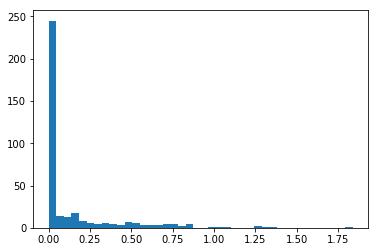

In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(inches, bins=40);

Гистограмма показывает, что большенство дней было без осадков, но не отражает другие параметры (сколько было дождливых дней, среднее количество осадков в эти дождливые дни, сколько было дней с более чем половиной дюйма осадков и тд.).

## Операторы сравнения как универсальные функции

In [4]:
x = np.array([1, 2, 3, 4, 5])

In [5]:
x < 3

array([ True,  True, False, False, False])

In [6]:
x > 3

array([False, False, False,  True,  True])

In [7]:
x <= 3

array([ True,  True,  True, False, False])

In [8]:
x >= 3

array([False, False,  True,  True,  True])

In [9]:
x != 3

array([ True,  True, False,  True,  True])

In [10]:
x == 3

array([False, False,  True, False, False])

In [11]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

In [12]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [13]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Работа с булевыми массивами

### Подсчет количества элементов

Для подсчета количества элементов True в булевом массиве удобно использовать функцию np.count_nonzero:

In [14]:
# Сколько значений массива меньше 6?
np.count_nonzero(x<6)

8

Другой способ - использовать np.sum.

In [15]:
np.sum(x < 6) # подсчет количества элементов в массиве, значения которых меньше 6 (False == 0, True == 1)

8

Суммирование, как и другие функции агрегирования, возможно выполнять как по строкам, так и по столбцам

In [16]:
np.sum(x < 6, axis=1) # количество элементов < 6 в каждой строке матрицы.

array([4, 2, 2])

In [17]:
np.any(x > 8) # проверка на присутствие в массиве значений больше 8 (хотя бы одного)

True

In [18]:
np.all(x > 8) # проверка, что все элементы массива больше 8

False

In [19]:
np.any(x < 0) # Имеются ли в массиве значения < 0

False

In [20]:
np.all(x < 10) # Все ли значения меньше 10

True

In [21]:
np.all(x == 6) # Все ли значения равны 6

False

In [22]:
np.any(x == 6)

True

Функции np.any() и np.all() также можно было использовать по конкретным осям.

In [23]:
np.all(x > 3, axis=0)

array([False, False, False, False])

In [24]:
np.all(x > 3, axis=1)

array([False, False, False])

In [25]:
np.any(x > 6, axis=0)

array([ True,  True,  True, False])

In [26]:
np.any(x > 6, axis=1)

array([False,  True,  True])

### Булевы операторы

In [28]:
np.sum((inches > 0.5) & (inches < 1)) # в Сиэтле было 29 дней с толщиной слоя осадков от 0,5 до 1 дюйма.

29

In [29]:
np.sum(~((inches <= 0.5)|(inches >= 1))) # символ ~ означает логическое НЕ

29

Примеры результатов, которые можно вычислить путем сочетания маскирования с агрегированием:

In [30]:
print("Number days without rain: ", np.sum(inches == 0))
print("Number days with rain: ", np.sum(inches != 0))
print("Days with more than 0.5 inches: ", np.sum(inches > 0.5))
print("Rainy days with < 0.1 inches: ", np.sum((inches > 0)&(inches < 0.2)))

Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches:  37
Rainy days with < 0.1 inches:  75


### Булевы массивы как маски

In [31]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [32]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

Чтобы выбрать нужные значения из массива, достаточно просто проиндексировать исходный массив x по этому булеву массиву. Такое действие носит название наложение маски или маскирование:

In [33]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [34]:
# создаем маску для всех дождливых дней
rainy = (inches > 0)
# создаем маску для всех летних дней (21 июня - 172 день)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
print("Median precip on rainy days in 2014 (inches):", np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches):", np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches):", np.max(inches[summer]))
print("Median precip on non-summer days in 2014 (inches):", np.median(inches[rainy & ~summer]))

Median precip on rainy days in 2014 (inches): 0.19488188976377951
Median precip on summer days in 2014 (inches): 0.0
Maximum precip on summer days in 2014 (inches): 0.8503937007874016
Median precip on non-summer days in 2014 (inches): 0.20078740157480315
